In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gather

In [62]:
df = pd.read_csv(r'C:\Users\ilesannmi\Desktop\Projectssss___\Job Placement Dataset\Job_Placement_Data.csv')

In [19]:
df.head(3)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed


In [20]:
#plt.figure(figsize=(12,8))

#sns.heatmap(df.corr(), cmap='Blues', annot =True, annot_kws={'fontsize':16, 'fontweight':'bold'})

In [21]:
df.shape

(215, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [23]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


# Assess

In [24]:
# A look at ther gender types
df.gender.unique()

array(['M', 'F'], dtype=object)

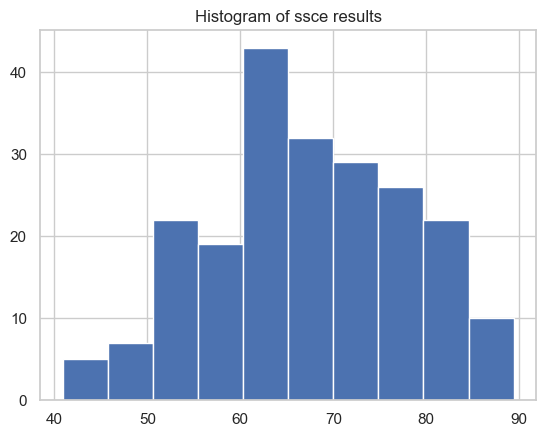

In [25]:
#ssc_percentage refers to their secondary school result percetage

df.ssc_percentage.hist()
plt.title("Histogram of ssce results")
plt.show()

In [26]:
#ssc_board 
df.ssc_board.unique()

df.ssc_board.value_counts()

Central    116
Others      99
Name: ssc_board, dtype: int64

### **Higher Education Result**

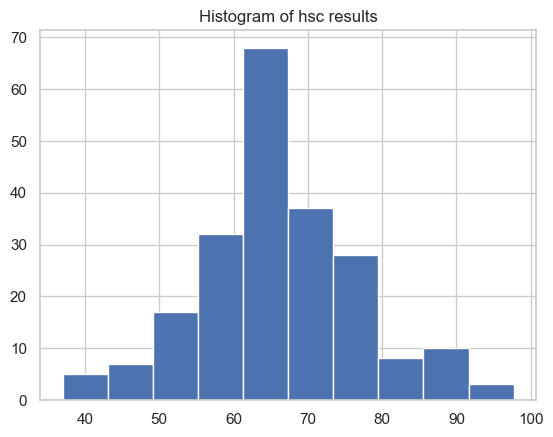

In [27]:
#ssc_percentage refers to their secondary school result percetage

df.hsc_percentage.hist()
plt.title("Histogram of hsc results")
plt.show()

In [28]:
df.hsc_board.value_counts()

Others     131
Central     84
Name: hsc_board, dtype: int64

In [29]:
131+84, 99 + 116

(215, 215)

#### Still a total of 215 boards

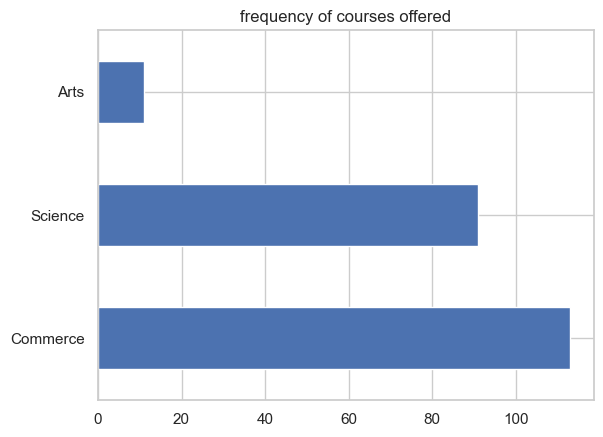

In [30]:
#frequency of higher degree courses offered

df.hsc_subject.value_counts().plot(kind= 'barh')
plt.title('frequency of courses offered')
plt.show()


In [31]:
#underdegree course

df.undergrad_degree.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64

##### More of commercial

In [32]:
#work experience 

df.work_experience.value_counts()

#many doesnt have work experience

No     141
Yes     74
Name: work_experience, dtype: int64

In [33]:
#Specialization

df.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [34]:
df.head(2)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


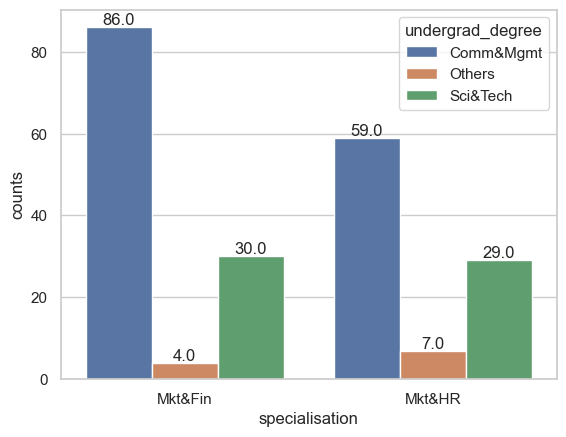

In [45]:

# Calculate the frequencies of each combination of categories
counts = df.groupby(['specialisation', 'undergrad_degree']).size().reset_index(name='counts')

# Create a clustered bar chart using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="specialisation", y="counts", hue="undergrad_degree", data=counts)

# Add values of each bar on top of them
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

#### how many undergraduate has work experience?



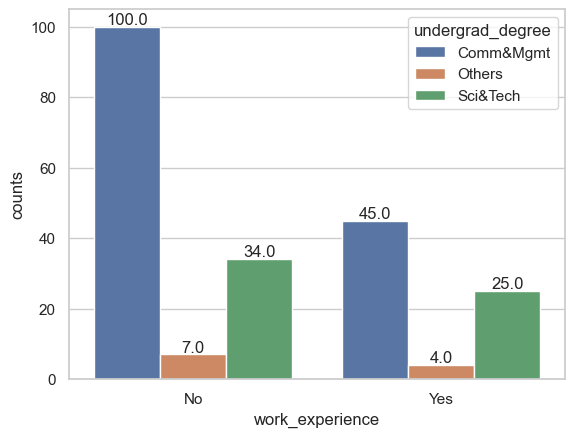

In [133]:
#countt = df.groupby(['undergrad_degree', 'work_experience']).size().plot(kind = 'barh')

countt = df.groupby(['work_experience', 'undergrad_degree']).size().reset_index(name='counts')

# Create a clustered bar chart using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="work_experience", y="counts", hue="undergrad_degree", data=countt)

# Add values of each bar on top of them
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

#### **Observation:** many undergraduate has no experience

## Job placement in relation to work experience

### Does work experience matter??

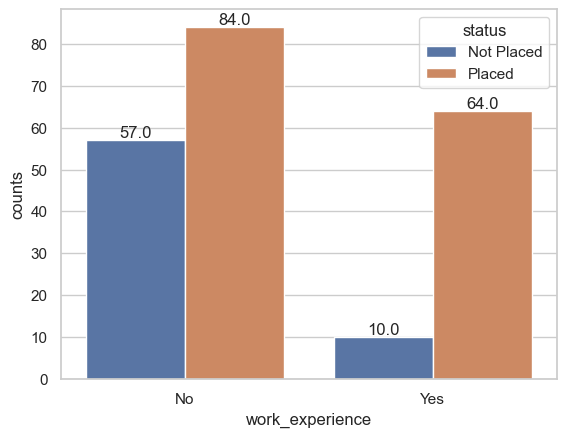

In [134]:
#countt = df.groupby(['undergrad_degree', 'work_experience']).size().plot(kind = 'barh')

countt = df.groupby(['work_experience', 'status']).size().reset_index(name='counts')

# Create a clustered bar chart using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="work_experience", y="counts", hue="status", data=countt)

# Add values of each bar on top of them
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

#### **Obseervation:**  Work experience doesnt really matter

## Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [63]:
df_new = df.copy() #backup for Labeling


for col in df_new.columns:
    if df_new[col].dtype == 'object':
        le = LabelEncoder()
        df_new[col] = le.fit_transform(df_new[col])


In [66]:
df.head(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


In [67]:
df_new.head(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,1
5,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58,0
6,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29,0
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,1
8,1,73.00,0,79.00,0,1,72.00,0,0,91.34,0,61.29,1
9,1,58.00,0,70.00,0,1,61.00,0,0,54.00,0,52.21,0


## MinmaxScaler

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_new = scaler.fit_transform(df_new)

In [80]:
df_new

array([[1.        , 0.53823954, 1.        , ..., 1.        , 0.28448276,
        1.        ],
       [1.        , 0.79241394, 0.        , ..., 0.        , 0.56484258,
        1.        ],
       [1.        , 0.49701093, 0.        , ..., 0.        , 0.2470015 ,
        1.        ],
       ...,
       [1.        , 0.53823954, 1.        , ..., 0.        , 0.69377811,
        1.        ],
       [0.        , 0.68253968, 1.        , ..., 1.        , 0.33808096,
        1.        ],
       [1.        , 0.43516801, 0.        , ..., 1.        , 0.33770615,
        0.        ]])

## Splitting

In [69]:
from sklearn.model_selection import train_test_split

X = df_new.drop('status', axis = 1)
y = df_new['status']

X.head(2)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28


In [70]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int32

### *Splitting*

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 45)

In [84]:
X.corr()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
gender,1.000000,-0.068969,0.019429,-0.021334,0.065945,0.071827,-0.173217,0.061345,0.085153,0.084294,-0.106160,-0.300531
ssc_percentage,-0.068969,1.000000,0.116194,0.511472,0.066996,0.236364,0.538404,0.205896,0.175675,0.261993,-0.172536,0.388478
ssc_board,0.019429,0.116194,1.000000,-0.137013,0.605883,0.050919,0.038070,0.100863,-0.040744,-0.018991,-0.051565,0.083120
hsc_percentage,-0.021334,0.511472,-0.137013,1.000000,-0.019548,-0.164091,0.434206,-0.086450,0.141025,0.245113,-0.241630,0.354823
hsc_board,0.065945,0.066996,0.605883,-0.019548,1.000000,0.152227,0.067229,0.057960,0.038357,0.039108,0.002232,0.090201
hsc_subject,0.071827,0.236364,0.050919,-0.164091,0.152227,1.000000,0.137276,0.596300,0.007856,0.075643,0.172107,0.039345
degree_percentage,-0.173217,0.538404,0.038070,0.434206,0.067229,0.137276,1.000000,0.079317,0.122648,0.224470,-0.218286,0.402364
undergrad_degree,0.061345,0.205896,0.100863,-0.086450,0.057960,0.596300,0.079317,1.000000,0.105816,0.011509,0.084361,0.116666
work_experience,0.085153,0.175675,-0.040744,0.141025,0.038357,0.007856,0.122648,0.105816,1.000000,0.056735,-0.191174,0.168811
emp_test_percentage,0.084294,0.261993,-0.018991,0.245113,0.039108,0.075643,0.224470,0.011509,0.056735,1.000000,-0.236315,0.218055


<AxesSubplot:>

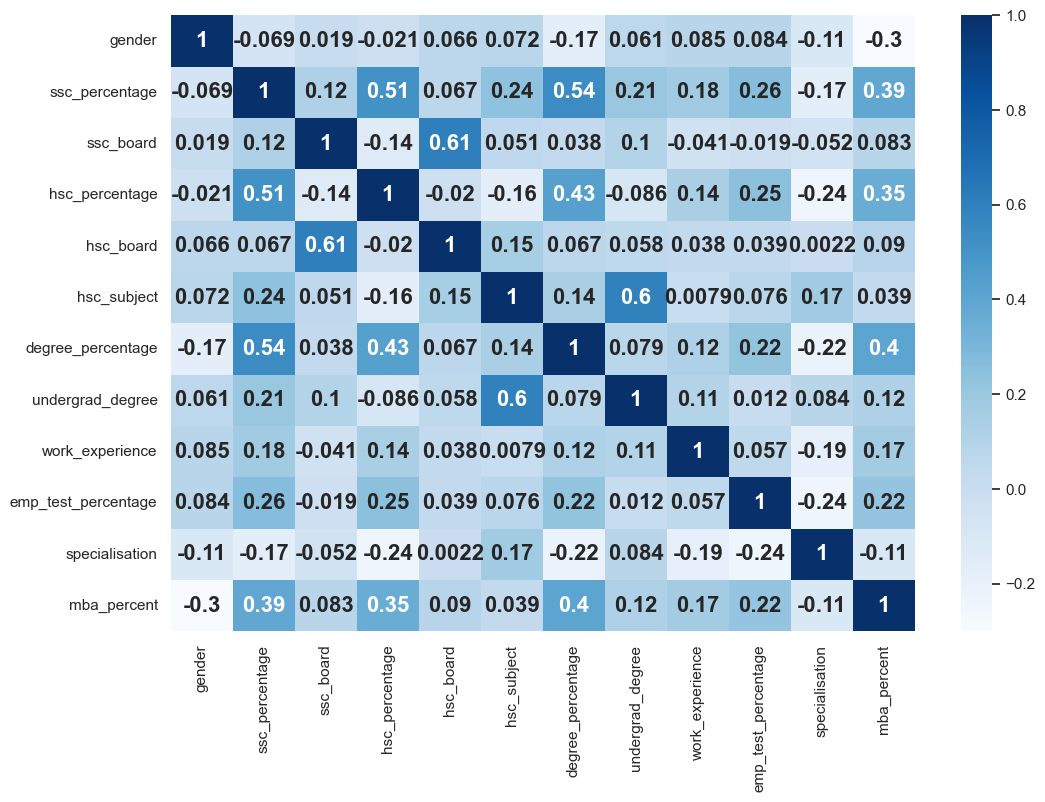

In [85]:
plt.figure(figsize=(12,8))

sns.heatmap(X.corr(), cmap='Blues', annot =True, annot_kws={'fontsize':16, 'fontweight':'bold'})
plt.show()

#### USING A VARYING THRESHOLD

In [86]:
threshold = 0.5

def correlation(dataset, threshold):
    column_correlation = set()
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                column_name = correlation_matrix.columns[i]
                column_correlation.add(column_name)
    return column_correlation


correlation(X, threshold)



{'degree_percentage', 'hsc_board', 'hsc_percentage', 'undergrad_degree'}

In [87]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


### **In relatable term for Nigerians (cause i am proudly one),**

##### 10th grade class: this would typically correspond to the second year of senior secondary education (SS2), when students are around 16-17 years old. ---- 

##### 12th grade class: This would correspond to the final year of senior secondary education (SS3), when students are around 17-18 years old. At the end of this year, students take the SSSE, which is a high-stakes examination that can determine their eligibility for higher education or employment opportunities. ---- This relates to the **HSC_PERCENTAGE**

#### **So we have:**
##### 1. HighSchool Percentage
##### 2. HSC board
##### 3. Undergrad degree -- what faculty
##### 4. Degree Percetage

1    148
0     67
Name: status, dtype: int64

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver= 'liblinear')
clf.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [97]:
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

In [94]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.93      0.90      0.91        41

    accuracy                           0.87        54
   macro avg       0.82      0.84      0.83        54
weighted avg       0.87      0.87      0.87        54



# FEATURE SELECTION MODEL

In [102]:
featured_df = df[['degree_percentage', 'hsc_board', 'hsc_percentage', 'undergrad_degree']]

In [103]:
featured_df.head()

,degree_percentage,hsc_board,hsc_percentage,undergrad_degree
0,58.00,Others,91.00,Sci&Tech
1,77.48,Others,78.33,Sci&Tech
2,64.00,Central,68.00,Comm&Mgmt
3,52.00,Central,52.00,Sci&Tech
4,73.30,Central,73.60,Comm&Mgmt


In [105]:


for col in featured_df.columns:
    if featured_df[col].dtype == 'object':
        le = LabelEncoder()
        featured_df[col] = le.fit_transform(featured_df[col])


C:\Users\ilesannmi\AppData\Local\Temp\ipykernel_8940\764549340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_df[col] = le.fit_transform(featured_df[col])


In [106]:
featured_df.head()

,degree_percentage,hsc_board,hsc_percentage,undergrad_degree
0,58.00,1,91.00,2
1,77.48,1,78.33,2
2,64.00,0,68.00,0
3,52.00,0,52.00,2
4,73.30,0,73.60,0


In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
featured_df = scaler.fit_transform(featured_df)

In [108]:
featured_df

array([[0.19512195, 1.        , 0.88962109, 1.        ],
       [0.6702439 , 1.        , 0.68088962, 1.        ],
       [0.34146341, 0.        , 0.5107084 , 0.        ],
       [0.04878049, 0.        , 0.24711697, 1.        ],
       [0.56829268, 0.        , 0.6029654 , 0.        ],
       [0.42073171, 1.        , 0.21087315, 1.        ],
       [0.70731707, 1.        , 0.20098847, 0.        ],
       [0.3902439 , 0.        , 0.44481054, 1.        ],
       [0.53658537, 0.        , 0.69192751, 0.        ],
       [0.26829268, 0.        , 0.54365733, 0.        ],
       [0.24390244, 0.        , 0.39538715, 0.        ],
       [0.6902439 , 0.        , 0.51729819, 0.        ],
       [0.36585366, 1.        , 0.29654036, 0.        ],
       [0.2195122 , 0.        , 0.82372323, 0.        ],
       [0.        , 0.        , 0.16474465, 0.        ],
       [0.46341463, 0.        , 0.62602965, 0.        ],
       [0.3804878 , 0.        , 0.48105437, 0.        ],
       [0.34146341, 0.        ,

In [120]:
X_feat = featured_df
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, random_state= 45)

In [121]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver= 'liblinear')
clf.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [122]:
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.8148148148148148


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.83      0.95      0.89        41

    accuracy                           0.81        54
   macro avg       0.77      0.67      0.69        54
weighted avg       0.80      0.81      0.79        54



# Overscaling the dataset

In [124]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [126]:
df_overscaled = pd.concat([df] * 500, ignore_index= True)

df_overscaled.shape

(107500, 13)

In [127]:
df_overscaled.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
